![Colegio Bourbaki](./Images/Bourbaki.png)

## Grandes Modelos de Lenguaje

En la última década, el campo del procesamiento del lenguaje natural (NLP, por sus siglas en inglés) ha experimentado avances significativos gracias al desarrollo de los grandes modelos de lenguaje. Estos modelos, basados en arquitecturas de redes neuronales profundas como los transformers, han revolucionado la manera en que las máquinas entienden y generan texto humano. El éxito de estos modelos se atribuye principalmente a su capacidad para aprender patrones complejos del lenguaje a partir de enormes volúmenes de datos textuales.

Los grandes modelos de lenguaje, como GPT (Generative Pre-trained Transformer) de OpenAI, BERT (Bidirectional Encoder Representations from Transformers) de Google, y otros modelos similares desarrollados por empresas como Facebook y Microsoft, son ejemplos destacados de esta tecnología. Estos modelos son preentrenados en un rango extenso de datos de Internet antes de ser afinados para tareas específicas de NLP, como la traducción automática, el resumen de textos, la generación de contenido, entre otros.

### Generación de texto

La generación de texto es una de las aplicaciones más impresionantes de los grandes modelos de lenguaje. Utilizando lo que han aprendido durante el entrenamiento, estos modelos pueden producir textos que van desde respuestas a preguntas hasta artículos completos de manera coherente y contextualmente adecuada. Esto se logra a través de un proceso donde el modelo predice la siguiente palabra en una secuencia dada una serie de palabras anteriores, iterando este proceso para generar secuencias de texto de longitud variable.

No obstante, el despliegue de grandes modelos de lenguaje no está exento de desafíos. La generación de lenguaje automático plantea preguntas éticas importantes, especialmente en cuanto a la veracidad y el sesgo del contenido generado. Además, el entrenamiento y la operación de estos modelos requieren una cantidad considerable de recursos computacionales, lo que plantea preocupaciones sobre la sostenibilidad y la accesibilidad de estas tecnologías.

A medida que avanzamos, es crucial que la comunidad de investigación en IA aborde estos desafíos de manera ética y responsable, asegurando que los beneficios de los grandes modelos de lenguaje sean accesibles para todos y que sus aplicaciones se desarrollen de manera que beneficie a la sociedad en su conjunto.

### Hugging Face

Hugging Face es una compañía líder en el campo de la inteligencia artificial que se ha especializado en el desarrollo y la aplicación de tecnologías de procesamiento del lenguaje natural (NLP, por sus siglas en inglés). Fundada en 2016, inicialmente comenzó como una aplicación social para compartir emojis y GIFs, pero rápidamente se transformó en un pionero de la IA al reconocer el potencial de los modelos de lenguaje.

La contribución más significativa de Hugging Face al mundo de la IA ha sido su plataforma y biblioteca de modelos de transformers, que facilita a los desarrolladores y científicos de datos el acceso a modelos de lenguaje preentrenados y las herramientas necesarias para entrenarlos y desplegarlos. La biblioteca Transformers, su producto más conocido, incluye una amplia variedad de modelos de última generación, como BERT, GPT, T5, y muchos otros, que se pueden utilizar para una amplia gama de tareas de NLP.

El enfoque de Hugging Face hacia la democratización de la IA también se refleja en su comunidad colaborativa y de código abierto. La compañía promueve una cultura de colaboración y transparencia, permitiendo que investigadores, desarrolladores y empresas compartan modelos y técnicas, fomentando así la innovación y el progreso en el campo. Además, Hugging Face también se esfuerza por abordar los aspectos éticos de la IA, trabajando en la mejora del entendimiento y la reducción de sesgos en los modelos de lenguaje.

Con una creciente comunidad de usuarios y contribuyentes, Hugging Face sigue a la vanguardia de la investigación en IA, ofreciendo soluciones que no solo avanzan en el estado del arte, sino que también se esfuerzan por ser éticamente responsables y accesibles para todos.

### Librerias

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

### Configuraciones

In [2]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:2'
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

### Carga de Datos

Los datos puede verse en: https://huggingface.co/datasets/andersonbcdefg/biology

Veremos cómo cargar y preprocesar fácilmente el conjunto de datos, y cómo utilizar la API Trainer para entrenar un modelo con él.

In [3]:
dataset = load_dataset("andersonbcdefg/biology")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 20000
    })
})

In [5]:
dataset['train'][0]

{'role_1': 'Biologist_RoleType.ASSISTANT',
 'topic;': 'Genetics',
 'sub_topic': 'Genetic basis of metabolic disorders',
 'message_1': 'How does genetic variation contribute to the development of metabolic disorders such as diabetes and obesity?',
 'message_2': "Genetic variation plays a significant role in the development of metabolic disorders such as diabetes and obesity. These variations can occur in the form of single nucleotide polymorphisms (SNPs), insertions, deletions, or other structural changes in the DNA sequence. These genetic differences can influence an individual's susceptibility to developing metabolic disorders through several mechanisms:\n\n1. Gene function: Genetic variations can directly affect the function of genes involved in metabolism, leading to altered protein function or expression. For example, mutations in the gene encoding for the hormone leptin or its receptor can lead to obesity due to impaired regulation of appetite and energy expenditure.\n\n2. Gene re

Vamos a tomar un subconjuto del dataset completo:

In [6]:
# Split the training set to obtain a random sample of 10,000 rows
sampled_dataset = dataset["train"].train_test_split(test_size=10000, seed=42)

In [7]:
dataset = sampled_dataset["train"].train_test_split(test_size=0.2)

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 2000
    })
})

### Análisis Exploratiorio

In [9]:
# Convert the train and test datasets to pandas DataFrames
train_df = dataset["train"].to_pandas()

In [10]:
train_df.head()

,role_1,topic;,sub_topic,message_1,message_2
0,Biologist_RoleType.ASSISTANT,Mycology,Fungal biotechnology and industrial applications,"""How can fungal biotechnology be utilized to d...",Fungal biotechnology can be utilized to develo...
1,Biologist_RoleType.ASSISTANT,Marine biology,Marine conservation genetics and its applicati...,How can marine conservation genetics be utiliz...,Marine conservation genetics can be utilized t...
2,Biologist_RoleType.ASSISTANT,Paleontology,The evolution of dinosaurs and their behavior,"""What factors led to the evolution of the uniq...",Several factors contributed to the evolution o...
3,Biologist_RoleType.ASSISTANT,Genetics,Genetic basis of metabolic disorders,How do mutations in specific genes related to ...,Mutations in specific genes related to metabol...
4,Biologist_RoleType.ASSISTANT,Entomology,The role of insects in pollination,How do different insect species contribute to ...,Insect pollination is a crucial ecological pro...


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   role_1     8000 non-null   object
 1   topic;     8000 non-null   object
 2   sub_topic  8000 non-null   object
 3   message_1  8000 non-null   object
 4   message_2  8000 non-null   object
dtypes: object(5)
memory usage: 312.6+ KB


In [12]:
# Frequency of categories in 'topic;'
print(train_df["topic;"].value_counts())

topic;
Paleontology      338
Microbiology      335
Cell biology      334
Neurobiology      334
Immunology        334
Ecology           331
Endocrinology     330
Entomology        324
Physiology        322
Biochemistry      321
Biotechnology     321
Marine biology    321
Evolution         319
Biogeography      318
Mycology          316
Biophysics        316
Botany            315
Genetics          315
Parasitology      313
Biomechanics      311
Zoology           310
Anatomy           309
Biostatistics     308
Taxonomy          304
Virology          301
Name: count, dtype: int64


In [13]:
# Frequency of categories in 'sub_topic'
train_df["sub_topic"].value_counts()

sub_topic
The evolution of antibiotic resistance in bacteria                                                      21
The evolution of birds and their flight                                                                 21
The role of T cells in the immune response                                                              21
Identification of the correct phylum for a given species                                                20
The origin and evolution of life on Earth                                                               19
                                                                                                        ..
The effect of grip width on bench press biomechanics                                                     6
The ecology and evolution of plant-animal interactions in mutualistic and antagonistic relationships     6
Identification of the correct order for a given species                                                  6
The use of insects as bioin

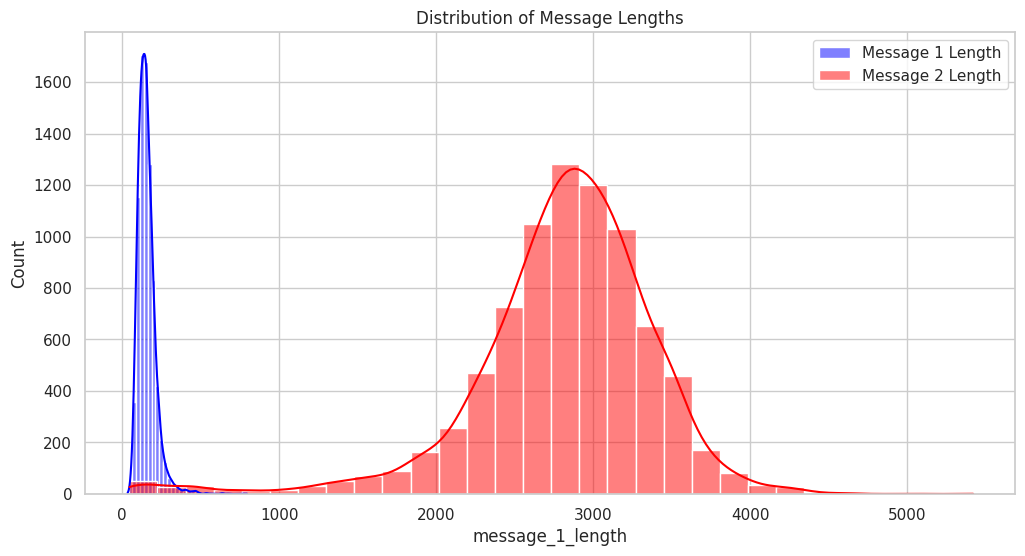

In [14]:
# Setting the aesthetic style for the plots
sns.set_theme(style="whitegrid")

# Visualizing message lengths
train_df["message_1_length"] = train_df["message_1"].apply(len)
train_df["message_2_length"] = train_df["message_2"].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(
    train_df["message_1_length"],
    bins=30,
    label="Message 1 Length",
    kde=True,
    color="blue",
)
sns.histplot(
    train_df["message_2_length"],
    bins=30,
    label="Message 2 Length",
    kde=True,
    color="red",
)
plt.legend()
plt.title("Distribution of Message Lengths")
plt.show()

### Causal Modeling

Para el modelado causal del lenguaje (CLM) vamos a tomar todos los textos de nuestro conjunto de datos y a concatenarlos después de haberlos tokenizado. A continuación, los dividiremos en ejemplos de una determinada longitud secuencial. De este modo, el modelo recibirá trozos de texto contiguos que pueden tener este aspecto:

* parte del texto 1

o

* final del texto 1 [BOS_TOKEN] comienzo del texto 2

dependiendo de si abarcan varios de los textos originales del conjunto de datos o no. Las etiquetas serán las mismas que las entradas, desplazadas hacia la izquierda.
Utilizaremos el modelo distilgpt2 para este ejemplo. En su lugar, puede elegir cualquiera de los puntos de control enumerados aquí: https://huggingface.co/models?other=causal-lm

### Modelo GPT2 Distilled

In [15]:
model_checkpoint = "distilgpt2"

Para tokenizar todos nuestros textos con el mismo vocabulario que se utilizó al entrenar el modelo, tenemos que descargar un tokenizador preentrenado. Todo esto lo hace la clase *AutoTokenizer*:

In [16]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

Crearemos una funcion para tokenizar los textos:

In [17]:
def tokenize_function(example):
    # Assuming example['message_2'] are the fields you want to tokenize
    tokenized_output = tokenizer(
        example["message_2"], padding="max_length", truncation=True, return_tensors="np"
    )
    return {
        "input_ids": tokenized_output["input_ids"].tolist(),
        "attention_mask": tokenized_output["attention_mask"].tolist(),
    }

Ahora podemos llamar al tokenizador en todos nuestros textos. Esto es muy sencillo, utilizando el método map de la librería Datasets. Hacemos uso de la función anterior y luego lo aplicamos a todas las divisiones de nuestro objeto datasets. No necesitaremos la columna de texto después, así que la descartamos.

In [18]:
tokenized_datasets = dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=["role_1", "topic;", "sub_topic", "message_1", "message_2"],
)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [19]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

Si ahora miramos un elemento de nuestros conjuntos de datos, veremos que el texto ha sido sustituido por los input_ids que necesitará el modelo:

In [20]:
tokenized_datasets["train"][1]

{'input_ids': [7676,
  500,
  14903,
  25862,
  460,
  307,
  21487,
  284,
  1205,
  4050,
  4542,
  10064,
  329,
  8556,
  290,
  22700,
  4693,
  287,
  16050,
  30020,
  832,
  262,
  1708,
  10581,
  25,
  198,
  198,
  16,
  13,
  2195,
  27289,
  8513,
  9573,
  25,
  23702,
  25862,
  460,
  1037,
  5004,
  262,
  8513,
  9573,
  1626,
  290,
  1871,
  9684,
  286,
  8556,
  290,
  22700,
  4693,
  13,
  3334,
  8513,
  9573,
  318,
  8780,
  329,
  262,
  890,
  12,
  4354,
  9441,
  290,
  6068,
  1799,
  286,
  257,
  4693,
  13,
  2750,
  13720,
  9684,
  351,
  1877,
  8513,
  9573,
  11,
  4542,
  4040,
  460,
  307,
  7924,
  3371,
  777,
  9684,
  284,
  2948,
  2252,
  2994,
  286,
  8513,
  12291,
  13,
  198,
  198,
  17,
  13,
  11440,
  4035,
  7310,
  9684,
  25,
  42295,
  4899,
  460,
  307,
  973,
  284,
  5911,
  7310,
  9684,
  393,
  4542,
  4991,
  1626,
  257,
  4693,
  13,
  770,
  1321,
  318,
  6393,
  329,
  18492,
  4542,
  10064,
  326,
  2074,
  26

Ahora viene la parte más difícil: tenemos que concatenar todos nuestros textos y dividir el resultado en pequeños trozos de un determinado tamaño de bloque. Para ello, utilizaremos de nuevo el método map, con la opción batched=True. Esta opción nos permite cambiar el número de ejemplos en los conjuntos de datos devolviendo un número de ejemplos diferente al que obtuvimos. De esta forma, podemos crear nuestras nuevas muestras a partir de un lote de ejemplos.

Primero, tomamos la longitud máxima con la que nuestro modelo fue preentrenado. Esto podría ser demasiado grande para caber en la RAM de tu GPU, así que aquí tomamos un poco menos, sólo 128.

In [21]:
#block_size = tokenizer.model_max_length
block_size = 128  # Set your block size appropriately

A continuación, escribimos la función de preprocesamiento que agrupará nuestros textos:

In [22]:
def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

Primero notemos que duplicamos las entradas para nuestras etiquetas. Esto se debe a que el modelo de la librería Transformers aplica el desplazamiento a la derecha, por lo que no necesitamos hacerlo manualmente.

Tengamos en cuenta también que, por defecto, el método map enviará un lote de 1.000 ejemplos para que sean tratados por la función de preprocesado. Así que aquí, dejaremos el resto para que los textos tokenizados concatenados sean un múltiplo del tamaño del bloque cada 1.000 ejemplos. Podemos ajustar esto pasando un tamaño de lote mayor (que también se procesará más lentamente). También podemos acelerar el preprocesamiento utilizando el multiprocesamiento:

In [23]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1024,
)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Podemos comprobar que nuestros conjuntos de datos han cambiado: ahora las muestras contienen trozos de tokens contiguos de la variable block_size, que potencialmente abarcan varios de nuestros textos originales.

In [24]:
tokenizer.decode(lm_datasets["train"][1]["input_ids"])

' they can help break down and remove these pollutants, reducing their impact on the environment and human health.\n\n2. Bioconversion of waste materials: Fungi can be used to convert waste materials, such as agricultural residues, into valuable products like biofuels, enzymes, and bioplastics. This not only helps reduce waste but also provides an alternative to non-renewable resources.\n\n3. Enzyme production: Fungi are known for their ability to produce a wide range of enzymes, which can be used in various industrial processes. For example, cellulases and hemicellulases can be'

### Training

Ahora que los datos han sido limpiados, estamos listos para instanciar nuestra instancia Trainer. Primero creamos el modelo utilizando la misma configuración que nuestro punto de control, pero inicializado con pesos aleatorios:

In [25]:
model = AutoModelForCausalLM.from_pretrained(model_checkpoint)

In [26]:
LR = 0.001

In [27]:
model_name = model_checkpoint.split("/")[-1]

Vamos a necesitar pasar también atributos al modelo:

In [28]:
training_args = TrainingArguments(
    f"{model_name}-finetuned-microbiology",
    evaluation_strategy="epoch",
    learning_rate=LR,
    weight_decay=LR * 0.1,
    push_to_hub=False, # este atributo lo pueden utilizar para mandar el modelo a Hugging Face
)

Instanciamos la clase Trainer:

In [29]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["test"],
)

Antes de entrenar, tomemos conciencia y comparemos con el caso de resúmenes de texto. Con cuántas líneas de código logramos llegar al entrenamiento?

In [30]:
trainer.train()

  0%|          | 0/24000 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 198.00 MiB. GPU 0 has a total capacity of 3.63 GiB of which 46.69 MiB is free. Process 12567 has 2.40 GiB memory in use. Including non-PyTorch memory, this process has 1.09 GiB memory in use. Of the allocated memory 985.24 MiB is allocated by PyTorch, and 62.76 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Una vez completado el entrenamiento, podemos evaluar nuestro modelo y obtener su perplejidad en el conjunto de validación de la siguiente manera:

In [ ]:
import math
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Podemos guardar el modelo si así lo deseamos:

In [ ]:
save_directory = "./Data/Model/GPT2"

In [ ]:
model.save_pretrained(save_directory)

In [ ]:
tokenizer.save_pretrained(save_directory)

### Testing

Vamos a generar una función que nos permite hacer inferencias a partir de 'prompts':

In [ ]:
def generate_text(prompt, model_path):
    # Load tokenizer and model from the specified model directory
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path)

    # Encode the prompt text with attention mask
    encoding = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True)

    # Generate text using the model
    outputs = model.generate(
        input_ids=encoding['input_ids'],
        attention_mask=encoding['attention_mask'],
        max_length=512,
        pad_token_id=tokenizer.eos_token_id,  # Set pad_token_id to eos_token_id
        num_return_sequences=1
    )

    # Decode and print the output text
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(decoded_output)

In [ ]:
model_directory = "./Data/Model/"

##### Prompting

Vamos a comenzar a probar el modelo:

In [ ]:
prompt_text = "Explain the role of bacteria in the nitrogen cycle."
generate_text(prompt_text, model_directory)

In [ ]:
prompt_text = "Describe the process of gram staining and its significance in microbiology."
generate_text(prompt_text, model_directory)

In [ ]:
prompt_text = "Discuss the impact of antibiotics on human gut microbiota."
generate_text(prompt_text, model_directory)

In [ ]:
prompt_text = "Outline the methods used to culture viruses in the laboratory."
generate_text(prompt_text, model_directory)

In [ ]:
prompt_text = "Compare and contrast aerobic and anaerobic bacteria."
generate_text(prompt_text, model_directory)

Ejercicio: **Tratar de mejorar el modelo**

Veamos que sucede si introducimos un 'prompt' que no tenga relación alguna con el texto:

In [ ]:
prompt_text = "Tell me the history of Manchester City F.C."
generate_text(prompt_text, model_directory)

### Preguntas

**Preguntas Básicas**

1) ¿Qué es Hugging Face y cuál es su contribución principal al campo del procesamiento del lenguaje natural?

2) ¿Qué es un "transformer" en el contexto de aprendizaje automático?

3) Menciona al menos tres aplicaciones prácticas de los modelos transformer.

**Preguntas Intermedias**

4) ¿Cómo funciona la atención auto-dirigida en los modelos de transformers?

5) Explica la diferencia entre los modelos AutoModel y AutoTokenizer en la biblioteca Transformers de Hugging Face.

6) ¿Cuáles son las ventajas de utilizar la biblioteca Transformers para el desarrollo de modelos de NLP?

**Preguntas Avanzadas**

7) Describe el proceso de fine-tuning de un modelo transformer preentrenado para una tarea específica de NLP.
    
8) ¿Qué consideraciones se deben tener en cuenta al desplegar modelos transformers en producción?

9) Discute el impacto ético del uso de modelos de lenguaje grande como GPT-3 en la sociedad.

**Pregunta de Aplicación**

10) Diseña un experimento utilizando un modelo transformer para identificar el sentimiento de los tweets. Incluye qué modelo usarías, cómo entrenarías el modelo, y cómo evaluarías su rendimiento.
      

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)